# 서울시 구별 CCTV현황 분석하기
- 서울시 각 구별 CCTV수 파악
- 인구대비 CCTV 비율을 파악해서 순위매기기
- 인구대비 CCTV의 예측치를 확인하고,CCTV가 부족한 구 확인

In [2]:
# numpy :고성능 과학계산을 위한 라이브러리,다차원 데이터
# pandas : 데이터를 표 형식으로 보여줌 1,2차원 데이터
# matplotlb: 데이터 시각화

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## CSV파일 읽어오기 -서울시 구별 CCTV현황

In [4]:
cctv_seoul = pd.read_csv('CCTV_in_Seoul.csv',
                        encoding = 'utf-8')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [5]:
pop_seoul = pd.read_excel('population_in_Seoul.xls')
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


# 3.데이터 전처리

In [6]:
# cctv데이터 컬럼명 수정
# 기관명 > 구별
# rename({바꿀 값 : 바뀔 값}): 컬럼명 바꾸기
# cctv_seoul.rename(columns={cctv_seoul.columns[0]:"구별"})>값을 출력만 함

#값을 저장하는 두가지 방법
#1.동일변수에 출력값 저장하기
#cctv_seoul=cctv_seoul.rename(columns={cctv_seoul.columns[0]:"구별"})
#2.inplace=True속성사용하기: 출력>저장
cctv_seoul.rename(columns={cctv_seoul.columns[0]:"구별"},inplace=True)
cctv_seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [7]:
# population 데이터 수정
# 받아올 범위 지정하기
# header:시작할 행(row)선택
# uescols:가져올 column선택
pop_seoul = pd.read_excel('population_in_Seoul.xls',
                         header=2,
                         usecols='B,D,G,J,N')
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [8]:
#population 컬럼명 바꾸기
# 자치구>구별
# 계>인구수
# 계,1>한국인
# 계,2>외국인
# 65세이상 고령자 > 고령자
# {'자치구':'구별','계':'인구수'}
pop_seoul.rename(columns={
    pop_seoul.columns[0]:"구별",
    pop_seoul.columns[1]:"인구수",
    pop_seoul.columns[2]:"한국인",
    pop_seoul.columns[4]:"고령자"},
    inplace=True
)
pop_seoul.head()

,구별,인구수,한국인,계.2,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


### CCTV가 가장 적은 구와 가장 많은 구를 확인

In [9]:
#cctv 가장 적은 구 확인
#컬럼안에 값을 기준으로 정렬
#by 속성에 기준이 되는 컬럼 입력
# 기본 정렬값은 오름차순
cctv_seoul.sort_values(by='소계')

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348
5,광진구,707,573,78,53,174
2,강북구,748,369,120,138,204
1,강동구,773,379,99,155,377
3,강서구,884,388,258,184,81
19,영등포구,904,495,214,195,373


In [10]:
#cctv 가장 많은 구 확인
#정렬을 내림차순으로 바꾼다
# >ascending =False 속성 추가
cctv_seoul.sort_values(by='소계',ascending=False)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398
6,구로구,1561,1142,173,246,323
4,관악구,1496,846,260,390,613
16,성북구,1464,1009,78,360,204
10,동대문구,1294,1070,23,198,579
8,노원구,1265,542,57,451,516


### 최근 3년동안 CCTV가 많이 설치된 지역을 알아 보자

In [11]:
# 최근 3년 생성 갯수
# 컬럼값 2014+2015_2016
# 컬럼생성
# 변수명['생성컬럼명']=컬럼에 들어갈 값
cctv_seoul['최근 3년 생성 갯수']= cctv_seoul['2014년']+cctv_seoul['2015년']+cctv_seoul['2016년']

In [12]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 3년 생성 갯수
0,강남구,2780,1292,430,584,932,1946
1,강동구,773,379,99,155,377,631
2,강북구,748,369,120,138,204,462
3,강서구,884,388,258,184,81,523
4,관악구,1496,846,260,390,613,1263


### 최근 3년동안 CCTV증가율
- 1.'최근 3년 증가율'컬럼 생성
- 2.최근 3년 cctv증가 갯수/2013년 이전 ccrv갯수
- 3.어떤 구에서 가장 많은 비율의 cctv가 증가했는지 알아보기

In [13]:
cctv_seoul['최근 3년 증가율']=cctv_seoul['최근 3년 생성 갯수']/cctv_seoul['2013년도 이전']*100

In [14]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 3년 생성 갯수,최근 3년 증가율
0,강남구,2780,1292,430,584,932,1946,150.619195
1,강동구,773,379,99,155,377,631,166.490765
2,강북구,748,369,120,138,204,462,125.203252
3,강서구,884,388,258,184,81,523,134.793814
4,관악구,1496,846,260,390,613,1263,149.290780


In [15]:
cctv_seoul.sort_values(by='최근 3년 증가율',ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 3년 생성 갯수,최근 3년 증가율
22,종로구,1002,464,314,211,630,1155,248.922414
9,도봉구,485,238,159,42,386,587,246.638655
12,마포구,574,314,118,169,379,666,212.101911
8,노원구,1265,542,57,451,516,1024,188.929889
1,강동구,773,379,99,155,377,631,166.490765


###  서울시 인구 데이터 파악

In [16]:
# 행, 열의 갯수 출력
cctv_seoul.shape

(25, 8)

In [17]:
pop_seoul.shape

(27, 5)

In [18]:
cctv_seoul.columns

Index(['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년', '최근 3년 생성 갯수',
       '최근 3년 증가율'],
      dtype='object')

In [19]:
pop_seoul.columns

Index(['구별', '인구수', '한국인', '계.2', '고령자'], dtype='object')

In [20]:
cctv_seoul['구별'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [21]:
pop_seoul['구별'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [22]:
#set
#집합 자료형
#-순서가 없음
#-중복을 허용하지 않는다
set(pop_seoul['구별'])-set(cctv_seoul['구별'])
#pop_seoul에는 있고 cctv_seoul에는 없는 데이터

{nan, '합계'}

In [23]:
set(cctv_seoul['구별'])-set(pop_seoul['구별'])

set()

In [26]:
set(cctv_seoul['구별'])|set(pop_seoul['구별'])

{nan,
 '강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구',
 '합계'}

### pop_seoul['구별']에서 nan값과 합계 값이 있는 행 삭제

In [27]:
#Boolean인덱싱을 통해서 '구별' 컬럼에 합계 값
pop_seoul[pop_seoul['구별']=='합계']

,구별,인구수,한국인,계.2,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0


In [28]:
# ==:같냐?
# 같으면 True
# 다르면 False
pop_seoul['구별']=='합계'

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
Name: 구별, dtype: bool

In [29]:
# 인덱싱에 Boolean값을 사용하면
# True값은 출력하고
# False 값은 출력하지 않는다.
pop_seoul[pop_seoul['구별']=='합계'].index

Int64Index([0], dtype='int64')

In [30]:
#drop 함수
#drop(행 번호)
#합계 행 제거
pop_seoul.drop([0],inplace=True)

In [32]:
# 결측치 제거
# isnull()
# 결측치:True
# 결측치가 아닌값 :False
pop_seoul['구별'].isnull()

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구별, dtype: bool

In [33]:
del_index = pop_seoul[pop_seoul['구별'].isnull()].index

In [34]:
pop_seoul.drop(del_index,inplace=True)

### 구별 컬럼을 기준으로 데이터 합치기

In [35]:
# 데이터 프레임을 합치는 함수
# concat: 행, 열을 기준으로 데이터 프레임을 합침
# merge: 행,열 속의 값을 기준으로 데이터 프레임을 합침

In [36]:
data_merge = pd.merge(cctv_seoul,pop_seoul,on='구별')

In [37]:
data_merge

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 3년 생성 갯수,최근 3년 증가율,인구수,한국인,계.2,고령자
0,강남구,2780,1292,430,584,932,1946,150.619195,570500.0,565550.0,4950.0,63167.0
1,강동구,773,379,99,155,377,631,166.490765,453233.0,449019.0,4214.0,54622.0
2,강북구,748,369,120,138,204,462,125.203252,330192.0,326686.0,3506.0,54813.0
3,강서구,884,388,258,184,81,523,134.793814,603772.0,597248.0,6524.0,72548.0
4,관악구,1496,846,260,390,613,1263,149.290780,525515.0,507203.0,18312.0,68082.0
5,광진구,707,573,78,53,174,305,53.228621,372164.0,357211.0,14953.0,42214.0
6,구로구,1561,1142,173,246,323,742,64.973730,447874.0,416487.0,31387.0,56833.0
7,금천구,1015,674,51,269,354,674,100.000000,255082.0,236353.0,18729.0,32970.0
8,노원구,1265,542,57,451,516,1024,188.929889,569384.0,565565.0,3819.0,71941.0
9,도봉구,485,238,159,42,386,587,246.638655,348646.0,346629.0,2017.0,51312.0


## 4.인구대비 CCTV비율
- '인구대비 CCTV비율'컬럼 생성
- data_merge에서 소계/인구수 값 대입
- 인구대비 CCTV비율'순위매기기

In [38]:
data_merge['인구대비CCTV비율']=data_merge['소계']/data_merge['인구수']*100

In [39]:
data_merge['인구대비CCTV비율']

0     0.487292
1     0.170552
2     0.226535
3     0.146413
4     0.284673
5     0.189970
6     0.348536
7     0.397911
8     0.222170
9     0.139110
10    0.350207
11    0.264472
12    0.147312
13    0.294043
14    0.428594
15    0.341211
16    0.317391
17    0.092587
18    0.423769
19    0.224326
20    0.665020
21    0.378852
22    0.615404
23    0.503603
24    0.159227
Name: 인구대비CCTV비율, dtype: float64

In [40]:
data_merge.sort_values(by='인구대비CCTV비율',ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 3년 생성 갯수,최근 3년 증가율,인구수,한국인,계.2,고령자,인구대비CCTV비율
20,용산구,1624,1368,218,112,398,728,53.216374,244203.0,229456.0,14747.0,36231.0,0.665020
22,종로구,1002,464,314,211,630,1155,248.922414,162820.0,153589.0,9231.0,25425.0,0.615404
23,중구,671,413,190,72,348,610,147.699758,133240.0,124312.0,8928.0,20764.0,0.503603
0,강남구,2780,1292,430,584,932,1946,150.619195,570500.0,565550.0,4950.0,63167.0,0.487292
14,서초구,1930,1406,157,336,398,891,63.371266,450310.0,445994.0,4316.0,51733.0,0.428594


##  인구대비 CCTV의 예측치를 확인하고,CCTV가 부족한 구 확인

In [41]:
# 구별 컬럼을 인덱스로 만들기
# set_index('인덱스로 만들 컬럼 이름')
data_merge.set_index('구별',inplace=True)

In [43]:
from matplotlib import rc
rc('font',family='Malgun Gothic')

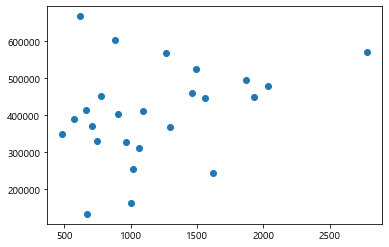

In [44]:
# 인구수 대비 CCTV 수 시각화
# plt.scatter(x좌표,y좌표)
# 왼쪽 위로 갈수록 인구수 대비 CCTV가 적다
# 오른쪽 아래로 갈수록 인구수 대비 CCTV가 많다.
plt.scatter(data_merge['소계'],data_merge['인구수'])
plt.show()

In [45]:
data_merge.sort_values(by='인구대비CCTV비율',
                      ascending=False,
                      inplace = True)

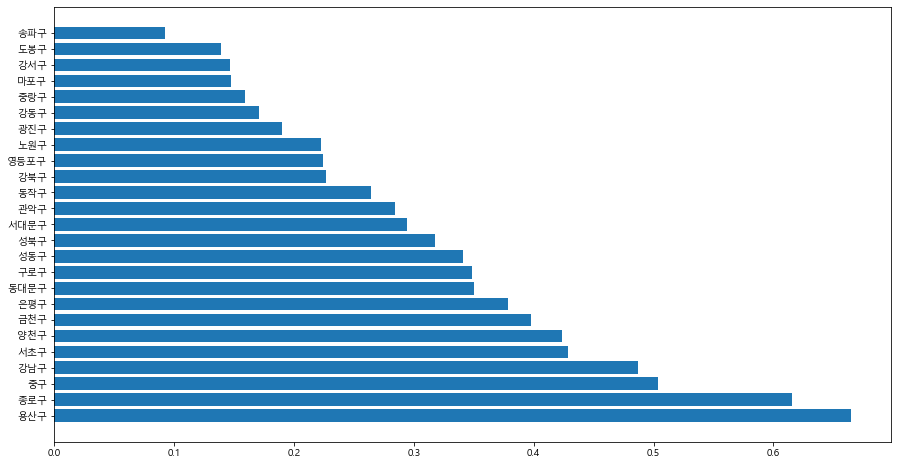

In [46]:
plt.figure(figsize = (15,8))
plt.barh(data_merge.index,data_merge['인구대비CCTV비율'])
plt.show()

### 인구수 대비 CCTV비율 예측값 만들기

In [47]:
# 머신 러닝 모델 받아오기
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [48]:
#학습하기
# 인구수가 몇명일 때 몇개의 cctv가 적당한 예측값인가를 확인해보자
#문제는 대부분 2차원 #정답은 1차원데이터
linear_model.fit(data_merge[['인구수']],
                data_merge[['소계']])

LinearRegression()

In [49]:
#학습한 값 확인하기
print('값 1: ',linear_model.coef_)#기울기
print('값 2: ',linear_model.intercept_)#절편

값 1:  [[0.00130916]]
값 2:  [645.06649658]


In [50]:
#예측하기
linear_model.predict([[453233]])#문제는 늘 2차원 집어넣은 값은 인구수고 예측값은 어울리는 cctv개수

array([[1238.42289235]])